# Natural Language Processing

Lets understand the basic process of pattern recognition that is needed to work with text data. This approach can be used for a large number of basic operations on text data like 
- Document Classification (e.g. topic of an article)
- Sequence to Sequence Learning (e.g. translations)
- Sentiment Analysis

Lets start with seeing how a text sequence can be encoded into numbers and processed to prepare for these tasks

## Tokenisation

Lets take the sentence - **The quick brown fox jumped over the lazy dog**

We need to first break this sentence in to smaller constituents - called **tokens**. Now there are three ways of creating the tokens can happen:

- **Individual character** - create tokens for each
- **Individual word** - Create tokens for each word in the sentence
- **N-gram** - Create tokens by taking n-grams words in the sentence

### Create word tokens

**Pre-processing - split, punctuation & case**

There is some basic **pre-processing** that has been done in the process of creating word tokens
- Split the sentence on **whitespace**
- Filter **punctuations**
- Change to **lower case** text

After this pre-processing, we can get each token.

In [45]:
import numpy as np
import pandas as pd

In [46]:
from keras.preprocessing.text import text_to_word_sequence

In [47]:
sentence = 'The quick brown fox jumped over the lazy dog.'

In [48]:
text_to_word_sequence(sentence)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

In [49]:
import spacy

In [50]:
#! python -m spacy download en_core_web_sm

In [46]:
nlp = spacy.load('en_core_web_sm')

In [47]:
sentence = 'The quick brown fox jumped over the lazy dog'
doc = nlp(sentence)

In [85]:
for token in doc:
    print(token)

The
quick
brown
fox
jumped
over
the
lazy
dog


## Vectorisation

Once you have tokens, we need to find a way to represent them as vectors. Let's look at two traditional way of representing them as vectors

- Frequency Based
    - Binary
    - Count 
    - tfidf
    - Co-occurence (Skipgram)
- Prediction Based
    - Pre-trained Vectors
    - Learning Vectors
    - Learning vectors with the task

### One-Hot Encoding 

In [4]:
from keras.preprocessing.text import one_hot, hashing_trick

In [5]:
# Given a size of vocabulary, do one-hot encoding
one_hot(sentence, n=10)

[7, 8, 6, 6, 8, 3, 7, 6, 8]

In [6]:
# Given a size of vocabulary, do hash encoding (to save space)
hashing_trick(sentence, n=100, hash_function="md5")

[51, 13, 19, 11, 7, 95, 51, 74, 33]

** Using the Tokenizer API **

In [8]:
from keras.preprocessing.text import Tokenizer

In [22]:
# Instantiate the Tokenizer
simple_tokenizer = Tokenizer()

In [23]:
# Fit the Tokenizer
simple_tokenizer.fit_on_texts([sentence])

In [40]:
# See the word vectors
simple_tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumped': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [41]:
from helpers import get_word_vectors

In [42]:
get_word_vectors(simple_tokenizer)

,word,1,2,3,4,5,6,7,8
1,the,1,0,0,0,0,0,0,0
2,quick,0,1,0,0,0,0,0,0
3,brown,0,0,1,0,0,0,0,0
4,fox,0,0,0,1,0,0,0,0
5,jumped,0,0,0,0,1,0,0,0
6,over,0,0,0,0,0,1,0,0
7,lazy,0,0,0,0,0,0,1,0
8,dog,0,0,0,0,0,0,0,1


Normally we will be working with a set of text (like sentences), so it is better to use the tokenizer API

In [11]:
sentences = ['The quick brown fox jumped over the lazy dog', 
             'The dog woke up lazily and barked at the fox',
             'The fox looked back and just ignored the dog']

In [34]:
# Instantiate and Fit
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [57]:
get_word_vectors(tokenizer)

,word,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,the,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,fox,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dog,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,and,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,quick,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,brown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,jumped,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,over,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,lazy,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,woke,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [33]:
tokenizer.texts_to_sequences(sentences)

[[1, 5, 6, 2, 7, 8, 1, 9, 3],
 [1, 3, 10, 11, 12, 4, 13, 14, 1, 2],
 [1, 2, 15, 16, 4, 17, 18, 1, 3]]

In [ ]:
02


In [35]:
tokenizer.texts_to_matrix(sentences, mode="binary")

array([[0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1.]])

In [56]:
tokenizer.texts_to_matrix??

Signature: tokenizer.texts_to_matrix(texts, mode='binary')
Source:   
    def texts_to_matrix(self, texts, mode='binary'):
        """Convert a list of texts to a Numpy matrix.

        # Arguments
            texts: list of strings.
            mode: one of "binary", "count", "tfidf", "freq".

        # Returns
            A Numpy matrix.
        """
        sequences = self.texts_to_sequences(texts)
        return self.sequences_to_matrix(sequences, mode=mode)
File:      /opt/conda/lib/python3.6/site-packages/keras/preprocessing/text.py
Type:      method


In [51]:
from helpers import get_sentence_vectors

ImportError: cannot import name 'get_sentence_vectors'

In [52]:
def get_sentence_vectors(sentences, tokenizer, mode="binary"):
    matrix = tokenizer.texts_to_matrix(sentences, mode=mode)
    df = pd.DataFrame(matrix)
    df.drop(columns=0, inplace=True)
    df.columns = tokenizer.word_index
    return df

In [55]:
get_sentence_vectors(sentences, tokenizer, mode="tfidf")

,the,fox,dog,and,quick,brown,jumped,over,lazy,woke,up,lazily,barked,at,looked,back,just,ignored
0,0.947512,0.559616,0.559616,0.000000,0.916291,0.916291,0.916291,0.916291,0.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.947512,0.559616,0.559616,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.916291,0.916291,0.916291,0.916291,0.916291,0.000000,0.000000,0.000000,0.000000
2,0.947512,0.559616,0.559616,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916291,0.916291,0.916291,0.916291


In [274]:
mode = "tfidf"

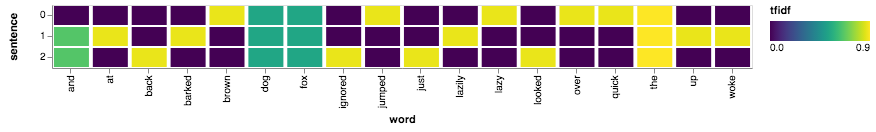

In [276]:
alt.Chart(df).mark_rect().encode(
    x = "word",
    y = "sentence:N",
    color = "tfidf",
    tooltip = mode
).properties(
    width=700
).interactive()

In [217]:
df.head()

,##,the,quick,brown,fox,jumped,over,lazy,dog,woke,up,lazily,and,barked,at,looked,back,just,ignored
0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [165]:
tokenizer.word_index

{'the': 1,
 'fox': 2,
 'dog': 3,
 'and': 4,
 'quick': 5,
 'brown': 6,
 'jumped': 7,
 'over': 8,
 'lazy': 9,
 'woke': 10,
 'up': 11,
 'lazily': 12,
 'barked': 13,
 'at': 14,
 'looked': 15,
 'back': 16,
 'just': 17,
 'ignored': 18}

In [11]:
one_hot_results = tokenizer.texts_to_matrix(sentence, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8 unique tokens.
